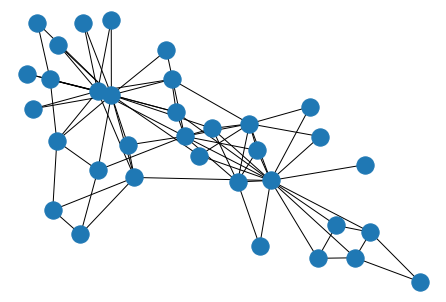

In [1]:
# Create a graph
import networkx as nx
G = nx.karate_club_graph()

# Visualize the graph, for fun
import matplotlib.pyplot as plt
nx.draw(G)

In [2]:
import gurobipy as gp
from gurobipy import GRB

In [3]:
# Create model object
m = gp.Model()

# Create variable for each node
x = m.addVars( G.nodes, vtype=GRB.BINARY )

# Objective function: maximize number of nodes
m.setObjective( gp.quicksum( x[i] for i in G.nodes ), GRB.MAXIMIZE )

# Add constraint for each missing edge (i.e., edge of the complement graph)
CG = nx.complement(G)

# Among selected nodes, every pair must either be adjacent or have a common friend *in the selection*
m.addConstrs( x[i] + x[j] <= 1 + gp.quicksum( x[c] for c in nx.common_neighbors(G,i,j) ) for i,j in CG.edges )

# Solve
m.optimize()

Academic license - for non-commercial use only - expires 2021-07-26
Using license file C:\Users\Austin\gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 483 rows, 34 columns and 1359 nonzeros
Model fingerprint: 0xd3cb9571
Variable types: 0 continuous, 34 integer (34 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 17.0000000
Presolve removed 89 rows and 3 columns
Presolve time: 0.03s
Presolved: 394 rows, 31 columns, 1158 nonzeros
Variable types: 0 continuous, 31 integer (31 binary)

Root relaxation: objective 1.800000e+01, 15 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0          

In [4]:
print("Objective:",m.objVal)

selected_nodes = [ i for i in G.nodes if x[i].x > 0.5 ]

print("Selected nodes:", selected_nodes)

Objective: 18.0
Selected nodes: [8, 9, 13, 14, 15, 18, 19, 20, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33]


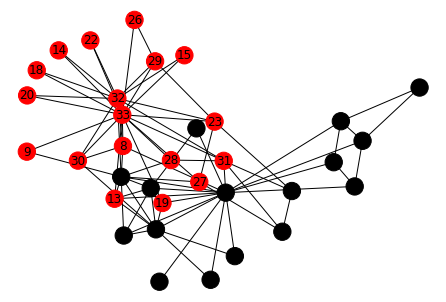

In [5]:
# Visualize the solution
node_colors = [ "red" if i in selected_nodes else "black" for i in G.nodes ]

nx.draw( G, with_labels=True, node_color=node_colors )

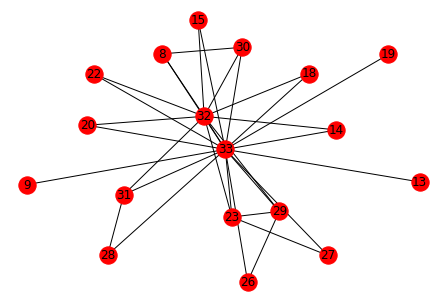

In [6]:
nx.draw( G.subgraph(selected_nodes), with_labels=True, node_color="red")